In [1]:
import datetime
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

print(pd.__version__)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#################################
# NE PAS RETIRER CETTE LIGNE
#################################
np.random.seed(42)

2.2.2


#### On va essayer de prédire le prix à partir du nombre de balcons

(ie $Y = a*X + b$ avec $Y$ le prix et $X$ le nombre de balcons)
- a est le coefficient associé à X
- b est l'intercept (où ordonnée à l'origine)

In [2]:
# On lit le dataset
df = pd.read_csv("data/dataset.csv")
cols = ['balcony', 'price']
df = df[cols]
df.head(3)

,balcony,price
0,1.0,39.07
1,3.0,120.00
2,3.0,62.00


In [3]:
# On supprime les lignes avec des valeurs nulles
# Car sinon on ne pourra pas entraîner de modèle
df["has_null"] = df.isnull().any(axis=1)
print(round(100*df["has_null"].sum() / len(df), 2), "% de valeurs nulles")
print(len(df), "lignes avant cleaning")
df = df[~df.has_null]
print(len(df), "lignes après cleaning")

4.57 % de valeurs nulles
13320 lignes avant cleaning
12711 lignes après cleaning


#### On entraîne un modèle pour prédire le prix en fonction du nombre de balcons

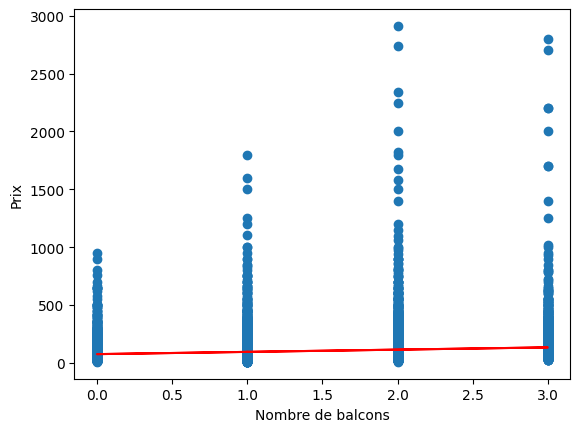

In [4]:
Y = df["price"]
X = df[["balcony"]]

lm = LinearRegression(
    fit_intercept=True # on fit un modèle : Y=a*x (pas d'intercept)
)
lm.fit(X, Y)

# On trace le nuage de points
plt.scatter(df.balcony, df.price)
plt.xlabel("Nombre de balcons")
plt.ylabel("Prix")

# On trace la droite de régression
predictions = lm.predict(X)
plt.plot(df.balcony, predictions, color="red")

#### Sur une partie du Dataset (90 %) - on entraîne un modèle pour prédire le prix en fonction du nombre de balcons
#### Sur le reste du Dataset, on effectue une prédiction et on compare à la vraie valeur

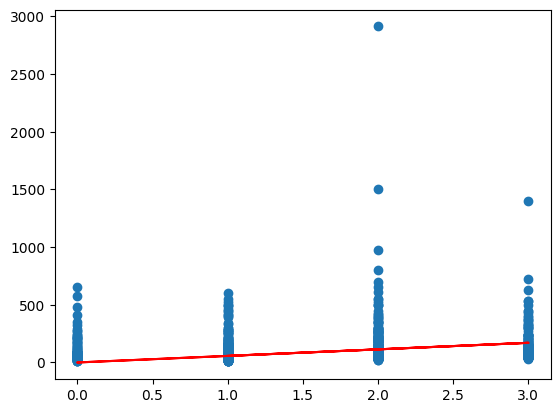

In [5]:
# Train et Test
df_train, df_test = train_test_split(
    df, train_size = 0.9, test_size = 0.1, random_state=42
)

# Train
y_train = df_train["price"]
X_train = df_train[["balcony"]]

# Test
y_test = df_test["price"]
X_test = df_test[["balcony"]]

# On fit (=apprendre) sur le train
lm = LinearRegression(
    fit_intercept=False # on fit un modèle : Y=a*x (pas d'intercept)
)
lm.fit(X_train, y_train)

# Prédiction sur le test
y_pred_test = lm.predict(X_test)
plt.scatter(X_test['balcony'], y_test)
plt.plot(X_test['balcony'], y_pred_test, color='red')